In [75]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklift.models import TwoModels
import lightgbm as lgb
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve
from imblearn.pipeline import Pipeline
from collections import Counter

%matplotlib inline

In [35]:
#Read the dataset
df = pd.read_csv("criteo-uplift-data.csv")

In [3]:
df.shape

(13979592, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [5]:
df.isnull().sum()

f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64

In [6]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07
mean,1.962030e+01,1.006998e+01,8.446582e+00,4.178923e+00,1.033884e+01,4.028513e+00,-4.155356e+00,5.101765e+00,3.933581e+00,1.602764e+01,5.333396e+00,-1.709672e-01,8.500001e-01,2.916680e-03,4.699200e-02,3.063122e-02
std,5.377464e+00,1.047557e-01,2.993161e-01,1.336645e+00,3.433081e-01,4.310974e-01,4.577914e+00,1.205248e+00,5.665958e-02,7.018975e+00,1.682288e-01,2.283277e-02,3.570713e-01,5.392748e-02,2.116217e-01,1.723164e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.192341e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.443646e+01,1.005965e+01,8.723335e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

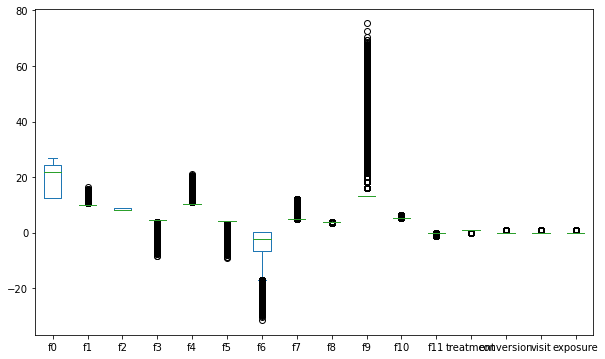

In [7]:
df.plot.box(figsize=(10,6))

In [8]:
df['treatment'].value_counts(normalize = True)

1    0.85
0    0.15
Name: treatment, dtype: float64

<AxesSubplot:xlabel='treatment', ylabel='count'>

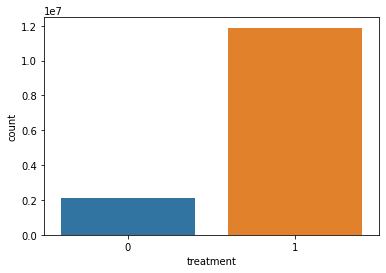

In [9]:
sns.countplot(x=df.treatment)

In [10]:
df['visit'].value_counts(normalize = True)

0    0.953008
1    0.046992
Name: visit, dtype: float64

<AxesSubplot:xlabel='visit', ylabel='count'>

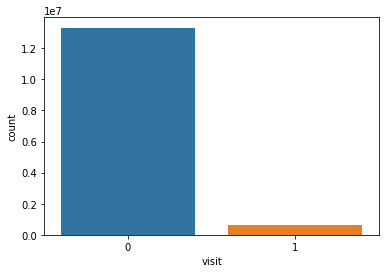

In [11]:
sns.countplot(x=df.visit)

In [12]:
df['conversion'].value_counts(normalize = True)

0    0.997083
1    0.002917
Name: conversion, dtype: float64

<AxesSubplot:xlabel='conversion', ylabel='count'>

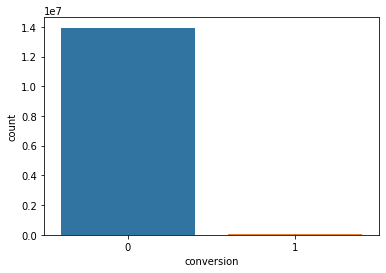

In [13]:
sns.countplot(x=df.conversion)

In [14]:
df['exposure'].value_counts(normalize = True)

0    0.969369
1    0.030631
Name: exposure, dtype: float64

<AxesSubplot:xlabel='exposure', ylabel='count'>

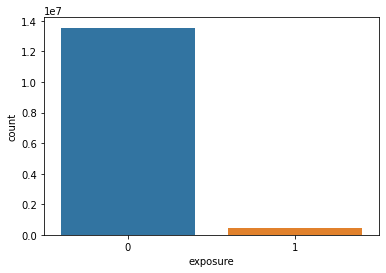

In [15]:
sns.countplot(x=df.exposure)

Text(0.5, 1.0, 'Feature Heatmap')

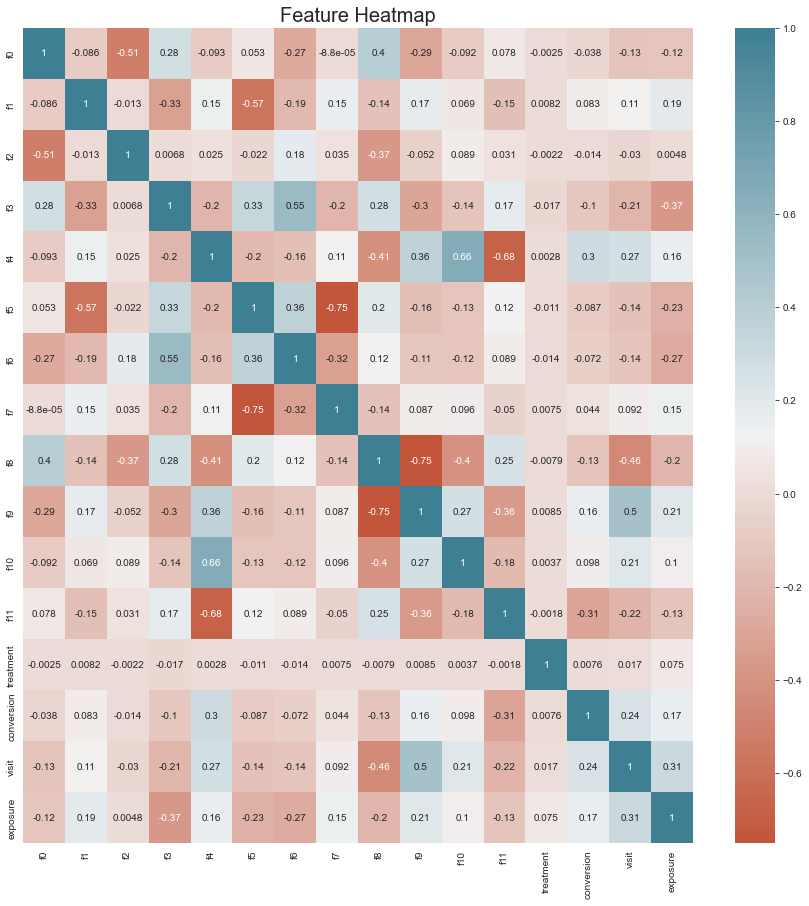

In [16]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,15))

sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True)
plt.title("Feature Heatmap", fontsize = 20)

In [17]:
pd.crosstab(df.treatment, df.visit, normalize='index')

visit,0,1
treatment,,
0,0.961799,0.038201
1,0.951457,0.048543


In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [20]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [61]:
X = df.drop(columns=['conversion','treatment'])

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 14 columns):
 #   Column    Dtype  
---  ------    -----  
 0   f0        float64
 1   f1        float64
 2   f2        float64
 3   f3        float64
 4   f4        float64
 5   f5        float64
 6   f6        float64
 7   f7        float64
 8   f8        float64
 9   f9        float64
 10  f10       float64
 11  f11       float64
 12  visit     int64  
 13  exposure  int64  
dtypes: float64(12), int64(2)
memory usage: 1.5 GB


In [64]:
treatment = df['treatment']

In [41]:
y = df['conversion']

In [83]:
X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X,treatment, y, random_state=23, stratify=treatment, test_size=0.33)

In [77]:
print(X_train.shape, X_test.shape, treatment_train.shape, treatment_test.shape, y_train.shape, y_test.shape)

(9366326, 14) (4613266, 14) (9366326,) (4613266,) (9366326,) (4613266,)


### DDR Treatment

In [87]:
treatment_model = CatBoostClassifier(random_state=23)
control_model = CatBoostClassifier(random_state=23)
tm = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='ddr_treatment')

In [88]:
tm = tm.fit(X_train, y_train, treatment_train)

Learning rate set to 0.477151
0:	learn: 0.0471985	total: 2.09s	remaining: 34m 44s
1:	learn: 0.0114557	total: 3.86s	remaining: 32m 6s
2:	learn: 0.0090979	total: 5.25s	remaining: 29m 4s
3:	learn: 0.0088789	total: 6.53s	remaining: 27m 5s
4:	learn: 0.0087393	total: 8.08s	remaining: 26m 48s
5:	learn: 0.0087052	total: 9.58s	remaining: 26m 27s
6:	learn: 0.0086822	total: 11s	remaining: 26m 5s
7:	learn: 0.0086603	total: 12.4s	remaining: 25m 40s
8:	learn: 0.0086506	total: 13.6s	remaining: 24m 52s
9:	learn: 0.0086195	total: 14.9s	remaining: 24m 31s
10:	learn: 0.0086138	total: 16.1s	remaining: 24m 8s
11:	learn: 0.0086089	total: 17.2s	remaining: 23m 33s
12:	learn: 0.0085959	total: 18.3s	remaining: 23m 12s
13:	learn: 0.0085829	total: 19.4s	remaining: 22m 48s
14:	learn: 0.0085787	total: 20.6s	remaining: 22m 32s
15:	learn: 0.0085683	total: 21.7s	remaining: 22m 15s
16:	learn: 0.0085633	total: 22.8s	remaining: 21m 55s
17:	learn: 0.0085522	total: 23.9s	remaining: 21m 42s
18:	learn: 0.0085407	total: 25.1s

153:	learn: 0.0081621	total: 3m 19s	remaining: 18m 15s
154:	learn: 0.0081587	total: 3m 20s	remaining: 18m 15s
155:	learn: 0.0081556	total: 3m 22s	remaining: 18m 15s
156:	learn: 0.0081537	total: 3m 23s	remaining: 18m 14s
157:	learn: 0.0081519	total: 3m 25s	remaining: 18m 12s
158:	learn: 0.0081499	total: 3m 26s	remaining: 18m 10s
159:	learn: 0.0081481	total: 3m 27s	remaining: 18m 9s
160:	learn: 0.0081458	total: 3m 28s	remaining: 18m 8s
161:	learn: 0.0081444	total: 3m 30s	remaining: 18m 7s
162:	learn: 0.0081427	total: 3m 31s	remaining: 18m 6s
163:	learn: 0.0081413	total: 3m 33s	remaining: 18m 6s
164:	learn: 0.0081382	total: 3m 34s	remaining: 18m 6s
165:	learn: 0.0081361	total: 3m 36s	remaining: 18m 5s
166:	learn: 0.0081336	total: 3m 37s	remaining: 18m 4s
167:	learn: 0.0081316	total: 3m 39s	remaining: 18m 4s
168:	learn: 0.0081292	total: 3m 40s	remaining: 18m 4s
169:	learn: 0.0081267	total: 3m 41s	remaining: 18m 3s
170:	learn: 0.0081252	total: 3m 43s	remaining: 18m 3s
171:	learn: 0.0081234	

304:	learn: 0.0078937	total: 6m 59s	remaining: 15m 56s
305:	learn: 0.0078923	total: 7m 1s	remaining: 15m 55s
306:	learn: 0.0078901	total: 7m 2s	remaining: 15m 54s
307:	learn: 0.0078884	total: 7m 4s	remaining: 15m 53s
308:	learn: 0.0078864	total: 7m 5s	remaining: 15m 51s
309:	learn: 0.0078858	total: 7m 7s	remaining: 15m 50s
310:	learn: 0.0078823	total: 7m 8s	remaining: 15m 49s
311:	learn: 0.0078802	total: 7m 10s	remaining: 15m 48s
312:	learn: 0.0078789	total: 7m 11s	remaining: 15m 47s
313:	learn: 0.0078768	total: 7m 12s	remaining: 15m 45s
314:	learn: 0.0078744	total: 7m 13s	remaining: 15m 43s
315:	learn: 0.0078731	total: 7m 15s	remaining: 15m 41s
316:	learn: 0.0078710	total: 7m 16s	remaining: 15m 40s
317:	learn: 0.0078697	total: 7m 17s	remaining: 15m 38s
318:	learn: 0.0078681	total: 7m 19s	remaining: 15m 38s
319:	learn: 0.0078665	total: 7m 21s	remaining: 15m 37s
320:	learn: 0.0078645	total: 7m 23s	remaining: 15m 38s
321:	learn: 0.0078630	total: 7m 25s	remaining: 15m 37s
322:	learn: 0.00

454:	learn: 0.0076756	total: 10m 43s	remaining: 12m 50s
455:	learn: 0.0076744	total: 10m 44s	remaining: 12m 49s
456:	learn: 0.0076728	total: 10m 46s	remaining: 12m 47s
457:	learn: 0.0076714	total: 10m 47s	remaining: 12m 46s
458:	learn: 0.0076700	total: 10m 48s	remaining: 12m 44s
459:	learn: 0.0076686	total: 10m 50s	remaining: 12m 43s
460:	learn: 0.0076669	total: 10m 51s	remaining: 12m 41s
461:	learn: 0.0076659	total: 10m 53s	remaining: 12m 40s
462:	learn: 0.0076652	total: 10m 54s	remaining: 12m 39s
463:	learn: 0.0076641	total: 10m 56s	remaining: 12m 38s
464:	learn: 0.0076627	total: 10m 57s	remaining: 12m 36s
465:	learn: 0.0076612	total: 10m 59s	remaining: 12m 35s
466:	learn: 0.0076592	total: 11m	remaining: 12m 34s
467:	learn: 0.0076577	total: 11m 2s	remaining: 12m 32s
468:	learn: 0.0076564	total: 11m 3s	remaining: 12m 31s
469:	learn: 0.0076551	total: 11m 5s	remaining: 12m 30s
470:	learn: 0.0076541	total: 11m 6s	remaining: 12m 28s
471:	learn: 0.0076528	total: 11m 7s	remaining: 12m 26s
4

602:	learn: 0.0074764	total: 14m 21s	remaining: 9m 27s
603:	learn: 0.0074755	total: 14m 23s	remaining: 9m 26s
604:	learn: 0.0074743	total: 14m 24s	remaining: 9m 24s
605:	learn: 0.0074735	total: 14m 26s	remaining: 9m 23s
606:	learn: 0.0074727	total: 14m 27s	remaining: 9m 21s
607:	learn: 0.0074718	total: 14m 29s	remaining: 9m 20s
608:	learn: 0.0074713	total: 14m 30s	remaining: 9m 19s
609:	learn: 0.0074702	total: 14m 32s	remaining: 9m 17s
610:	learn: 0.0074689	total: 14m 34s	remaining: 9m 16s
611:	learn: 0.0074674	total: 14m 35s	remaining: 9m 15s
612:	learn: 0.0074667	total: 14m 37s	remaining: 9m 13s
613:	learn: 0.0074656	total: 14m 39s	remaining: 9m 12s
614:	learn: 0.0074639	total: 14m 40s	remaining: 9m 11s
615:	learn: 0.0074627	total: 14m 42s	remaining: 9m 9s
616:	learn: 0.0074621	total: 14m 43s	remaining: 9m 8s
617:	learn: 0.0074602	total: 14m 45s	remaining: 9m 7s
618:	learn: 0.0074593	total: 14m 47s	remaining: 9m 5s
619:	learn: 0.0074585	total: 14m 48s	remaining: 9m 4s
620:	learn: 0.0

753:	learn: 0.0073065	total: 18m 3s	remaining: 5m 53s
754:	learn: 0.0073054	total: 18m 5s	remaining: 5m 52s
755:	learn: 0.0073043	total: 18m 6s	remaining: 5m 50s
756:	learn: 0.0073034	total: 18m 7s	remaining: 5m 49s
757:	learn: 0.0073021	total: 18m 8s	remaining: 5m 47s
758:	learn: 0.0073014	total: 18m 10s	remaining: 5m 46s
759:	learn: 0.0073006	total: 18m 12s	remaining: 5m 44s
760:	learn: 0.0073000	total: 18m 13s	remaining: 5m 43s
761:	learn: 0.0072991	total: 18m 14s	remaining: 5m 41s
762:	learn: 0.0072983	total: 18m 16s	remaining: 5m 40s
763:	learn: 0.0072975	total: 18m 17s	remaining: 5m 38s
764:	learn: 0.0072960	total: 18m 18s	remaining: 5m 37s
765:	learn: 0.0072951	total: 18m 20s	remaining: 5m 36s
766:	learn: 0.0072935	total: 18m 21s	remaining: 5m 34s
767:	learn: 0.0072923	total: 18m 22s	remaining: 5m 33s
768:	learn: 0.0072910	total: 18m 24s	remaining: 5m 31s
769:	learn: 0.0072905	total: 18m 25s	remaining: 5m 30s
770:	learn: 0.0072895	total: 18m 27s	remaining: 5m 28s
771:	learn: 0.0

903:	learn: 0.0071549	total: 22m 5s	remaining: 2m 20s
904:	learn: 0.0071538	total: 22m 7s	remaining: 2m 19s
905:	learn: 0.0071534	total: 22m 8s	remaining: 2m 17s
906:	learn: 0.0071512	total: 22m 9s	remaining: 2m 16s
907:	learn: 0.0071496	total: 22m 11s	remaining: 2m 14s
908:	learn: 0.0071489	total: 22m 12s	remaining: 2m 13s
909:	learn: 0.0071479	total: 22m 14s	remaining: 2m 11s
910:	learn: 0.0071467	total: 22m 15s	remaining: 2m 10s
911:	learn: 0.0071462	total: 22m 17s	remaining: 2m 9s
912:	learn: 0.0071445	total: 22m 18s	remaining: 2m 7s
913:	learn: 0.0071433	total: 22m 19s	remaining: 2m 6s
914:	learn: 0.0071424	total: 22m 21s	remaining: 2m 4s
915:	learn: 0.0071411	total: 22m 22s	remaining: 2m 3s
916:	learn: 0.0071398	total: 22m 23s	remaining: 2m 1s
917:	learn: 0.0071379	total: 22m 25s	remaining: 2m
918:	learn: 0.0071362	total: 22m 26s	remaining: 1m 58s
919:	learn: 0.0071356	total: 22m 28s	remaining: 1m 57s
920:	learn: 0.0071343	total: 22m 30s	remaining: 1m 55s
921:	learn: 0.0071334	to

57:	learn: 0.0053193	total: 21.5s	remaining: 5m 48s
58:	learn: 0.0053095	total: 21.8s	remaining: 5m 47s
59:	learn: 0.0053039	total: 22.1s	remaining: 5m 45s
60:	learn: 0.0052977	total: 22.4s	remaining: 5m 44s
61:	learn: 0.0052914	total: 22.7s	remaining: 5m 42s
62:	learn: 0.0052880	total: 23s	remaining: 5m 42s
63:	learn: 0.0052832	total: 23.3s	remaining: 5m 40s
64:	learn: 0.0052778	total: 23.6s	remaining: 5m 39s
65:	learn: 0.0052693	total: 23.9s	remaining: 5m 38s
66:	learn: 0.0052639	total: 24.2s	remaining: 5m 37s
67:	learn: 0.0052587	total: 24.5s	remaining: 5m 36s
68:	learn: 0.0052559	total: 24.8s	remaining: 5m 34s
69:	learn: 0.0052524	total: 25s	remaining: 5m 32s
70:	learn: 0.0052481	total: 25.3s	remaining: 5m 31s
71:	learn: 0.0052431	total: 25.6s	remaining: 5m 29s
72:	learn: 0.0052340	total: 25.9s	remaining: 5m 28s
73:	learn: 0.0052308	total: 26.2s	remaining: 5m 27s
74:	learn: 0.0052262	total: 26.5s	remaining: 5m 26s
75:	learn: 0.0052231	total: 26.8s	remaining: 5m 26s
76:	learn: 0.005

214:	learn: 0.0045820	total: 1m 9s	remaining: 4m 14s
215:	learn: 0.0045791	total: 1m 10s	remaining: 4m 14s
216:	learn: 0.0045756	total: 1m 10s	remaining: 4m 13s
217:	learn: 0.0045727	total: 1m 10s	remaining: 4m 13s
218:	learn: 0.0045678	total: 1m 10s	remaining: 4m 13s
219:	learn: 0.0045657	total: 1m 11s	remaining: 4m 12s
220:	learn: 0.0045610	total: 1m 11s	remaining: 4m 12s
221:	learn: 0.0045566	total: 1m 11s	remaining: 4m 11s
222:	learn: 0.0045544	total: 1m 12s	remaining: 4m 10s
223:	learn: 0.0045528	total: 1m 12s	remaining: 4m 10s
224:	learn: 0.0045494	total: 1m 12s	remaining: 4m 10s
225:	learn: 0.0045475	total: 1m 12s	remaining: 4m 9s
226:	learn: 0.0045445	total: 1m 13s	remaining: 4m 9s
227:	learn: 0.0045399	total: 1m 13s	remaining: 4m 8s
228:	learn: 0.0045370	total: 1m 13s	remaining: 4m 8s
229:	learn: 0.0045353	total: 1m 13s	remaining: 4m 7s
230:	learn: 0.0045326	total: 1m 14s	remaining: 4m 7s
231:	learn: 0.0045294	total: 1m 14s	remaining: 4m 6s
232:	learn: 0.0045258	total: 1m 14s	

367:	learn: 0.0041179	total: 1m 53s	remaining: 3m 14s
368:	learn: 0.0041123	total: 1m 53s	remaining: 3m 14s
369:	learn: 0.0041098	total: 1m 53s	remaining: 3m 13s
370:	learn: 0.0041086	total: 1m 54s	remaining: 3m 13s
371:	learn: 0.0041052	total: 1m 54s	remaining: 3m 13s
372:	learn: 0.0041018	total: 1m 54s	remaining: 3m 12s
373:	learn: 0.0041004	total: 1m 54s	remaining: 3m 12s
374:	learn: 0.0040982	total: 1m 55s	remaining: 3m 11s
375:	learn: 0.0040944	total: 1m 55s	remaining: 3m 11s
376:	learn: 0.0040910	total: 1m 55s	remaining: 3m 11s
377:	learn: 0.0040887	total: 1m 55s	remaining: 3m 10s
378:	learn: 0.0040867	total: 1m 56s	remaining: 3m 10s
379:	learn: 0.0040856	total: 1m 56s	remaining: 3m 10s
380:	learn: 0.0040805	total: 1m 56s	remaining: 3m 9s
381:	learn: 0.0040765	total: 1m 56s	remaining: 3m 9s
382:	learn: 0.0040750	total: 1m 57s	remaining: 3m 8s
383:	learn: 0.0040744	total: 1m 57s	remaining: 3m 8s
384:	learn: 0.0040711	total: 1m 57s	remaining: 3m 8s
385:	learn: 0.0040689	total: 1m 5

521:	learn: 0.0037708	total: 2m 36s	remaining: 2m 23s
522:	learn: 0.0037697	total: 2m 37s	remaining: 2m 23s
523:	learn: 0.0037676	total: 2m 37s	remaining: 2m 22s
524:	learn: 0.0037635	total: 2m 37s	remaining: 2m 22s
525:	learn: 0.0037607	total: 2m 37s	remaining: 2m 22s
526:	learn: 0.0037554	total: 2m 38s	remaining: 2m 22s
527:	learn: 0.0037516	total: 2m 38s	remaining: 2m 21s
528:	learn: 0.0037496	total: 2m 38s	remaining: 2m 21s
529:	learn: 0.0037474	total: 2m 39s	remaining: 2m 21s
530:	learn: 0.0037466	total: 2m 39s	remaining: 2m 20s
531:	learn: 0.0037425	total: 2m 39s	remaining: 2m 20s
532:	learn: 0.0037406	total: 2m 40s	remaining: 2m 20s
533:	learn: 0.0037387	total: 2m 40s	remaining: 2m 19s
534:	learn: 0.0037347	total: 2m 40s	remaining: 2m 19s
535:	learn: 0.0037329	total: 2m 40s	remaining: 2m 19s
536:	learn: 0.0037322	total: 2m 41s	remaining: 2m 18s
537:	learn: 0.0037282	total: 2m 41s	remaining: 2m 18s
538:	learn: 0.0037275	total: 2m 41s	remaining: 2m 18s
539:	learn: 0.0037245	total:

675:	learn: 0.0034579	total: 3m 18s	remaining: 1m 35s
676:	learn: 0.0034563	total: 3m 18s	remaining: 1m 34s
677:	learn: 0.0034542	total: 3m 19s	remaining: 1m 34s
678:	learn: 0.0034521	total: 3m 19s	remaining: 1m 34s
679:	learn: 0.0034509	total: 3m 19s	remaining: 1m 34s
680:	learn: 0.0034488	total: 3m 20s	remaining: 1m 33s
681:	learn: 0.0034466	total: 3m 20s	remaining: 1m 33s
682:	learn: 0.0034431	total: 3m 20s	remaining: 1m 33s
683:	learn: 0.0034409	total: 3m 20s	remaining: 1m 32s
684:	learn: 0.0034399	total: 3m 21s	remaining: 1m 32s
685:	learn: 0.0034368	total: 3m 21s	remaining: 1m 32s
686:	learn: 0.0034347	total: 3m 21s	remaining: 1m 31s
687:	learn: 0.0034318	total: 3m 21s	remaining: 1m 31s
688:	learn: 0.0034290	total: 3m 22s	remaining: 1m 31s
689:	learn: 0.0034265	total: 3m 22s	remaining: 1m 30s
690:	learn: 0.0034229	total: 3m 22s	remaining: 1m 30s
691:	learn: 0.0034211	total: 3m 23s	remaining: 1m 30s
692:	learn: 0.0034185	total: 3m 23s	remaining: 1m 30s
693:	learn: 0.0034157	total:

829:	learn: 0.0031791	total: 4m 5s	remaining: 50.2s
830:	learn: 0.0031776	total: 4m 5s	remaining: 50s
831:	learn: 0.0031757	total: 4m 6s	remaining: 49.7s
832:	learn: 0.0031741	total: 4m 6s	remaining: 49.4s
833:	learn: 0.0031729	total: 4m 6s	remaining: 49.1s
834:	learn: 0.0031704	total: 4m 7s	remaining: 48.8s
835:	learn: 0.0031689	total: 4m 7s	remaining: 48.6s
836:	learn: 0.0031684	total: 4m 8s	remaining: 48.3s
837:	learn: 0.0031671	total: 4m 8s	remaining: 48.1s
838:	learn: 0.0031663	total: 4m 8s	remaining: 47.8s
839:	learn: 0.0031649	total: 4m 9s	remaining: 47.5s
840:	learn: 0.0031626	total: 4m 9s	remaining: 47.2s
841:	learn: 0.0031576	total: 4m 9s	remaining: 46.9s
842:	learn: 0.0031550	total: 4m 10s	remaining: 46.6s
843:	learn: 0.0031530	total: 4m 10s	remaining: 46.3s
844:	learn: 0.0031527	total: 4m 10s	remaining: 46s
845:	learn: 0.0031504	total: 4m 10s	remaining: 45.7s
846:	learn: 0.0031497	total: 4m 11s	remaining: 45.4s
847:	learn: 0.0031470	total: 4m 11s	remaining: 45.1s
848:	learn

985:	learn: 0.0029111	total: 4m 55s	remaining: 4.19s
986:	learn: 0.0029092	total: 4m 55s	remaining: 3.89s
987:	learn: 0.0029082	total: 4m 55s	remaining: 3.59s
988:	learn: 0.0029050	total: 4m 56s	remaining: 3.29s
989:	learn: 0.0029029	total: 4m 56s	remaining: 2.99s
990:	learn: 0.0029006	total: 4m 56s	remaining: 2.69s
991:	learn: 0.0028991	total: 4m 56s	remaining: 2.39s
992:	learn: 0.0028958	total: 4m 57s	remaining: 2.09s
993:	learn: 0.0028939	total: 4m 57s	remaining: 1.79s
994:	learn: 0.0028930	total: 4m 57s	remaining: 1.5s
995:	learn: 0.0028906	total: 4m 58s	remaining: 1.2s
996:	learn: 0.0028898	total: 4m 58s	remaining: 898ms
997:	learn: 0.0028881	total: 4m 58s	remaining: 599ms
998:	learn: 0.0028875	total: 4m 58s	remaining: 299ms
999:	learn: 0.0028857	total: 4m 59s	remaining: 0us


In [89]:
uplift_tm = tm.predict(X_test)

In [90]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_tm, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.2448


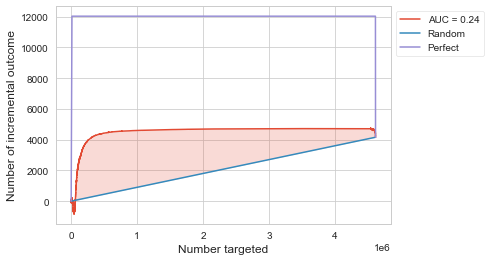

In [91]:
# with ideal Qini curve (red line)
# perfect=True

plot_qini_curve(y_test, uplift_tm, treatment_test, perfect=True);

### DDR Control

In [92]:
treatment_model = CatBoostClassifier(random_state=23)
control_model = CatBoostClassifier(random_state=23)
tm = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='ddr_control')

In [93]:
tm = tm.fit(X_train, y_train, treatment_train)

Learning rate set to 0.227502
0:	learn: 0.1880856	total: 486ms	remaining: 8m 5s
1:	learn: 0.0297964	total: 825ms	remaining: 6m 51s
2:	learn: 0.0103677	total: 1.13s	remaining: 6m 16s
3:	learn: 0.0072316	total: 1.44s	remaining: 5m 58s
4:	learn: 0.0064247	total: 1.74s	remaining: 5m 45s
5:	learn: 0.0060896	total: 2.01s	remaining: 5m 32s
6:	learn: 0.0059608	total: 2.34s	remaining: 5m 32s
7:	learn: 0.0058619	total: 2.63s	remaining: 5m 26s
8:	learn: 0.0058018	total: 2.94s	remaining: 5m 23s
9:	learn: 0.0057543	total: 3.22s	remaining: 5m 18s
10:	learn: 0.0057230	total: 3.5s	remaining: 5m 14s
11:	learn: 0.0057068	total: 3.81s	remaining: 5m 13s
12:	learn: 0.0056964	total: 4.09s	remaining: 5m 10s
13:	learn: 0.0056875	total: 4.37s	remaining: 5m 7s
14:	learn: 0.0056718	total: 4.66s	remaining: 5m 5s
15:	learn: 0.0056601	total: 4.94s	remaining: 5m 3s
16:	learn: 0.0056532	total: 5.19s	remaining: 5m
17:	learn: 0.0056352	total: 5.5s	remaining: 4m 59s
18:	learn: 0.0056227	total: 5.78s	remaining: 4m 58s
19

158:	learn: 0.0049792	total: 45.7s	remaining: 4m 1s
159:	learn: 0.0049746	total: 46s	remaining: 4m 1s
160:	learn: 0.0049738	total: 46.3s	remaining: 4m 1s
161:	learn: 0.0049708	total: 46.6s	remaining: 4m
162:	learn: 0.0049660	total: 46.9s	remaining: 4m
163:	learn: 0.0049621	total: 47.2s	remaining: 4m
164:	learn: 0.0049579	total: 47.5s	remaining: 4m
165:	learn: 0.0049529	total: 47.8s	remaining: 4m
166:	learn: 0.0049494	total: 48.1s	remaining: 4m
167:	learn: 0.0049483	total: 48.4s	remaining: 3m 59s
168:	learn: 0.0049466	total: 48.7s	remaining: 3m 59s
169:	learn: 0.0049432	total: 49s	remaining: 3m 59s
170:	learn: 0.0049417	total: 49.3s	remaining: 3m 58s
171:	learn: 0.0049392	total: 49.5s	remaining: 3m 58s
172:	learn: 0.0049348	total: 49.8s	remaining: 3m 57s
173:	learn: 0.0049323	total: 50.1s	remaining: 3m 57s
174:	learn: 0.0049304	total: 50.3s	remaining: 3m 57s
175:	learn: 0.0049261	total: 50.6s	remaining: 3m 56s
176:	learn: 0.0049220	total: 50.8s	remaining: 3m 56s
177:	learn: 0.0049194	to

313:	learn: 0.0044936	total: 1m 29s	remaining: 3m 14s
314:	learn: 0.0044913	total: 1m 29s	remaining: 3m 14s
315:	learn: 0.0044872	total: 1m 29s	remaining: 3m 14s
316:	learn: 0.0044845	total: 1m 30s	remaining: 3m 14s
317:	learn: 0.0044819	total: 1m 30s	remaining: 3m 13s
318:	learn: 0.0044803	total: 1m 30s	remaining: 3m 13s
319:	learn: 0.0044796	total: 1m 31s	remaining: 3m 13s
320:	learn: 0.0044786	total: 1m 31s	remaining: 3m 13s
321:	learn: 0.0044758	total: 1m 31s	remaining: 3m 13s
322:	learn: 0.0044710	total: 1m 32s	remaining: 3m 12s
323:	learn: 0.0044669	total: 1m 32s	remaining: 3m 12s
324:	learn: 0.0044631	total: 1m 32s	remaining: 3m 12s
325:	learn: 0.0044593	total: 1m 33s	remaining: 3m 12s
326:	learn: 0.0044579	total: 1m 33s	remaining: 3m 12s
327:	learn: 0.0044533	total: 1m 33s	remaining: 3m 12s
328:	learn: 0.0044490	total: 1m 34s	remaining: 3m 12s
329:	learn: 0.0044471	total: 1m 34s	remaining: 3m 12s
330:	learn: 0.0044458	total: 1m 35s	remaining: 3m 12s
331:	learn: 0.0044444	total:

467:	learn: 0.0041239	total: 2m 29s	remaining: 2m 50s
468:	learn: 0.0041228	total: 2m 30s	remaining: 2m 50s
469:	learn: 0.0041203	total: 2m 30s	remaining: 2m 49s
470:	learn: 0.0041182	total: 2m 30s	remaining: 2m 49s
471:	learn: 0.0041155	total: 2m 31s	remaining: 2m 49s
472:	learn: 0.0041133	total: 2m 31s	remaining: 2m 49s
473:	learn: 0.0041116	total: 2m 32s	remaining: 2m 49s
474:	learn: 0.0041102	total: 2m 32s	remaining: 2m 48s
475:	learn: 0.0041087	total: 2m 33s	remaining: 2m 48s
476:	learn: 0.0041068	total: 2m 33s	remaining: 2m 48s
477:	learn: 0.0041026	total: 2m 33s	remaining: 2m 47s
478:	learn: 0.0041008	total: 2m 34s	remaining: 2m 47s
479:	learn: 0.0041002	total: 2m 34s	remaining: 2m 47s
480:	learn: 0.0040987	total: 2m 34s	remaining: 2m 46s
481:	learn: 0.0040975	total: 2m 35s	remaining: 2m 46s
482:	learn: 0.0040954	total: 2m 35s	remaining: 2m 46s
483:	learn: 0.0040939	total: 2m 35s	remaining: 2m 46s
484:	learn: 0.0040926	total: 2m 36s	remaining: 2m 45s
485:	learn: 0.0040924	total:

621:	learn: 0.0038509	total: 3m 13s	remaining: 1m 57s
622:	learn: 0.0038493	total: 3m 14s	remaining: 1m 57s
623:	learn: 0.0038473	total: 3m 14s	remaining: 1m 57s
624:	learn: 0.0038464	total: 3m 14s	remaining: 1m 56s
625:	learn: 0.0038442	total: 3m 14s	remaining: 1m 56s
626:	learn: 0.0038441	total: 3m 15s	remaining: 1m 56s
627:	learn: 0.0038432	total: 3m 15s	remaining: 1m 55s
628:	learn: 0.0038394	total: 3m 15s	remaining: 1m 55s
629:	learn: 0.0038369	total: 3m 16s	remaining: 1m 55s
630:	learn: 0.0038358	total: 3m 16s	remaining: 1m 54s
631:	learn: 0.0038352	total: 3m 16s	remaining: 1m 54s
632:	learn: 0.0038343	total: 3m 16s	remaining: 1m 54s
633:	learn: 0.0038328	total: 3m 17s	remaining: 1m 53s
634:	learn: 0.0038313	total: 3m 17s	remaining: 1m 53s
635:	learn: 0.0038290	total: 3m 17s	remaining: 1m 53s
636:	learn: 0.0038254	total: 3m 17s	remaining: 1m 52s
637:	learn: 0.0038223	total: 3m 18s	remaining: 1m 52s
638:	learn: 0.0038209	total: 3m 18s	remaining: 1m 52s
639:	learn: 0.0038197	total:

773:	learn: 0.0035971	total: 3m 57s	remaining: 1m 9s
774:	learn: 0.0035955	total: 3m 57s	remaining: 1m 8s
775:	learn: 0.0035948	total: 3m 57s	remaining: 1m 8s
776:	learn: 0.0035935	total: 3m 57s	remaining: 1m 8s
777:	learn: 0.0035917	total: 3m 58s	remaining: 1m 7s
778:	learn: 0.0035912	total: 3m 58s	remaining: 1m 7s
779:	learn: 0.0035899	total: 3m 58s	remaining: 1m 7s
780:	learn: 0.0035889	total: 3m 58s	remaining: 1m 7s
781:	learn: 0.0035880	total: 3m 59s	remaining: 1m 6s
782:	learn: 0.0035864	total: 3m 59s	remaining: 1m 6s
783:	learn: 0.0035847	total: 3m 59s	remaining: 1m 6s
784:	learn: 0.0035827	total: 3m 59s	remaining: 1m 5s
785:	learn: 0.0035789	total: 4m	remaining: 1m 5s
786:	learn: 0.0035773	total: 4m	remaining: 1m 5s
787:	learn: 0.0035754	total: 4m	remaining: 1m 4s
788:	learn: 0.0035746	total: 4m	remaining: 1m 4s
789:	learn: 0.0035726	total: 4m 1s	remaining: 1m 4s
790:	learn: 0.0035712	total: 4m 1s	remaining: 1m 3s
791:	learn: 0.0035705	total: 4m 1s	remaining: 1m 3s
792:	learn: 

930:	learn: 0.0033640	total: 4m 41s	remaining: 20.9s
931:	learn: 0.0033631	total: 4m 41s	remaining: 20.6s
932:	learn: 0.0033625	total: 4m 42s	remaining: 20.3s
933:	learn: 0.0033608	total: 4m 42s	remaining: 20s
934:	learn: 0.0033592	total: 4m 42s	remaining: 19.6s
935:	learn: 0.0033579	total: 4m 42s	remaining: 19.3s
936:	learn: 0.0033560	total: 4m 43s	remaining: 19s
937:	learn: 0.0033545	total: 4m 43s	remaining: 18.7s
938:	learn: 0.0033535	total: 4m 43s	remaining: 18.4s
939:	learn: 0.0033531	total: 4m 44s	remaining: 18.1s
940:	learn: 0.0033519	total: 4m 44s	remaining: 17.8s
941:	learn: 0.0033505	total: 4m 44s	remaining: 17.5s
942:	learn: 0.0033492	total: 4m 45s	remaining: 17.2s
943:	learn: 0.0033475	total: 4m 45s	remaining: 16.9s
944:	learn: 0.0033471	total: 4m 45s	remaining: 16.6s
945:	learn: 0.0033461	total: 4m 45s	remaining: 16.3s
946:	learn: 0.0033453	total: 4m 46s	remaining: 16s
947:	learn: 0.0033444	total: 4m 46s	remaining: 15.7s
948:	learn: 0.0033443	total: 4m 46s	remaining: 15.4s

85:	learn: 0.0082823	total: 2m 5s	remaining: 22m 14s
86:	learn: 0.0082796	total: 2m 6s	remaining: 22m 12s
87:	learn: 0.0082759	total: 2m 8s	remaining: 22m 11s
88:	learn: 0.0082735	total: 2m 9s	remaining: 22m 7s
89:	learn: 0.0082696	total: 2m 11s	remaining: 22m 5s
90:	learn: 0.0082667	total: 2m 12s	remaining: 22m 2s
91:	learn: 0.0082642	total: 2m 13s	remaining: 22m 2s
92:	learn: 0.0082622	total: 2m 15s	remaining: 21m 59s
93:	learn: 0.0082592	total: 2m 16s	remaining: 21m 55s
94:	learn: 0.0082578	total: 2m 17s	remaining: 21m 51s
95:	learn: 0.0082558	total: 2m 19s	remaining: 21m 50s
96:	learn: 0.0082541	total: 2m 20s	remaining: 21m 48s
97:	learn: 0.0082529	total: 2m 21s	remaining: 21m 46s
98:	learn: 0.0082500	total: 2m 23s	remaining: 21m 45s
99:	learn: 0.0082479	total: 2m 25s	remaining: 21m 51s
100:	learn: 0.0082451	total: 2m 27s	remaining: 21m 53s
101:	learn: 0.0082428	total: 2m 29s	remaining: 21m 51s
102:	learn: 0.0082403	total: 2m 30s	remaining: 21m 50s
103:	learn: 0.0082392	total: 2m 3

236:	learn: 0.0079650	total: 5m 44s	remaining: 18m 28s
237:	learn: 0.0079631	total: 5m 45s	remaining: 18m 26s
238:	learn: 0.0079610	total: 5m 46s	remaining: 18m 24s
239:	learn: 0.0079596	total: 5m 48s	remaining: 18m 22s
240:	learn: 0.0079572	total: 5m 49s	remaining: 18m 21s
241:	learn: 0.0079554	total: 5m 51s	remaining: 18m 19s
242:	learn: 0.0079541	total: 5m 52s	remaining: 18m 17s
243:	learn: 0.0079512	total: 5m 53s	remaining: 18m 16s
244:	learn: 0.0079501	total: 5m 55s	remaining: 18m 14s
245:	learn: 0.0079475	total: 5m 56s	remaining: 18m 13s
246:	learn: 0.0079460	total: 5m 58s	remaining: 18m 11s
247:	learn: 0.0079438	total: 5m 59s	remaining: 18m 10s
248:	learn: 0.0079418	total: 6m 1s	remaining: 18m 8s
249:	learn: 0.0079399	total: 6m 2s	remaining: 18m 7s
250:	learn: 0.0079383	total: 6m 3s	remaining: 18m 5s
251:	learn: 0.0079369	total: 6m 5s	remaining: 18m 3s
252:	learn: 0.0079348	total: 6m 6s	remaining: 18m 1s
253:	learn: 0.0079337	total: 6m 7s	remaining: 18m
254:	learn: 0.0079321	tot

387:	learn: 0.0077048	total: 9m 25s	remaining: 14m 51s
388:	learn: 0.0077038	total: 9m 26s	remaining: 14m 50s
389:	learn: 0.0077015	total: 9m 28s	remaining: 14m 48s
390:	learn: 0.0077001	total: 9m 30s	remaining: 14m 48s
391:	learn: 0.0076984	total: 9m 31s	remaining: 14m 46s
392:	learn: 0.0076967	total: 9m 33s	remaining: 14m 45s
393:	learn: 0.0076948	total: 9m 35s	remaining: 14m 44s
394:	learn: 0.0076945	total: 9m 36s	remaining: 14m 43s
395:	learn: 0.0076928	total: 9m 38s	remaining: 14m 41s
396:	learn: 0.0076918	total: 9m 39s	remaining: 14m 40s
397:	learn: 0.0076906	total: 9m 40s	remaining: 14m 38s
398:	learn: 0.0076880	total: 9m 42s	remaining: 14m 37s
399:	learn: 0.0076870	total: 9m 43s	remaining: 14m 35s
400:	learn: 0.0076849	total: 9m 45s	remaining: 14m 34s
401:	learn: 0.0076835	total: 9m 46s	remaining: 14m 32s
402:	learn: 0.0076824	total: 9m 48s	remaining: 14m 31s
403:	learn: 0.0076817	total: 9m 49s	remaining: 14m 30s
404:	learn: 0.0076805	total: 9m 51s	remaining: 14m 28s
405:	learn

535:	learn: 0.0074852	total: 13m 38s	remaining: 11m 48s
536:	learn: 0.0074832	total: 13m 39s	remaining: 11m 46s
537:	learn: 0.0074817	total: 13m 41s	remaining: 11m 45s
538:	learn: 0.0074798	total: 13m 42s	remaining: 11m 43s
539:	learn: 0.0074782	total: 13m 44s	remaining: 11m 42s
540:	learn: 0.0074761	total: 13m 45s	remaining: 11m 40s
541:	learn: 0.0074750	total: 13m 47s	remaining: 11m 38s
542:	learn: 0.0074737	total: 13m 48s	remaining: 11m 37s
543:	learn: 0.0074724	total: 13m 50s	remaining: 11m 36s
544:	learn: 0.0074711	total: 13m 52s	remaining: 11m 34s
545:	learn: 0.0074699	total: 13m 53s	remaining: 11m 33s
546:	learn: 0.0074675	total: 13m 55s	remaining: 11m 31s
547:	learn: 0.0074653	total: 13m 56s	remaining: 11m 30s
548:	learn: 0.0074638	total: 13m 58s	remaining: 11m 28s
549:	learn: 0.0074622	total: 14m	remaining: 11m 27s
550:	learn: 0.0074608	total: 14m 2s	remaining: 11m 26s
551:	learn: 0.0074603	total: 14m 3s	remaining: 11m 24s
552:	learn: 0.0074587	total: 14m 5s	remaining: 11m 23s

684:	learn: 0.0072775	total: 18m 5s	remaining: 8m 19s
685:	learn: 0.0072760	total: 18m 7s	remaining: 8m 17s
686:	learn: 0.0072743	total: 18m 8s	remaining: 8m 16s
687:	learn: 0.0072730	total: 18m 10s	remaining: 8m 14s
688:	learn: 0.0072708	total: 18m 12s	remaining: 8m 13s
689:	learn: 0.0072686	total: 18m 14s	remaining: 8m 11s
690:	learn: 0.0072677	total: 18m 16s	remaining: 8m 10s
691:	learn: 0.0072663	total: 18m 18s	remaining: 8m 8s
692:	learn: 0.0072644	total: 18m 20s	remaining: 8m 7s
693:	learn: 0.0072630	total: 18m 21s	remaining: 8m 5s
694:	learn: 0.0072621	total: 18m 23s	remaining: 8m 4s
695:	learn: 0.0072608	total: 18m 25s	remaining: 8m 2s
696:	learn: 0.0072600	total: 18m 27s	remaining: 8m 1s
697:	learn: 0.0072590	total: 18m 29s	remaining: 7m 59s
698:	learn: 0.0072569	total: 18m 30s	remaining: 7m 58s
699:	learn: 0.0072551	total: 18m 32s	remaining: 7m 56s
700:	learn: 0.0072541	total: 18m 33s	remaining: 7m 55s
701:	learn: 0.0072526	total: 18m 35s	remaining: 7m 53s
702:	learn: 0.00725

835:	learn: 0.0070790	total: 22m 7s	remaining: 4m 20s
836:	learn: 0.0070775	total: 22m 9s	remaining: 4m 18s
837:	learn: 0.0070760	total: 22m 11s	remaining: 4m 17s
838:	learn: 0.0070745	total: 22m 12s	remaining: 4m 15s
839:	learn: 0.0070738	total: 22m 14s	remaining: 4m 14s
840:	learn: 0.0070726	total: 22m 15s	remaining: 4m 12s
841:	learn: 0.0070704	total: 22m 17s	remaining: 4m 10s
842:	learn: 0.0070691	total: 22m 18s	remaining: 4m 9s
843:	learn: 0.0070682	total: 22m 20s	remaining: 4m 7s
844:	learn: 0.0070666	total: 22m 21s	remaining: 4m 6s
845:	learn: 0.0070660	total: 22m 22s	remaining: 4m 4s
846:	learn: 0.0070645	total: 22m 24s	remaining: 4m 2s
847:	learn: 0.0070631	total: 22m 26s	remaining: 4m 1s
848:	learn: 0.0070623	total: 22m 28s	remaining: 3m 59s
849:	learn: 0.0070621	total: 22m 29s	remaining: 3m 58s
850:	learn: 0.0070610	total: 22m 31s	remaining: 3m 56s
851:	learn: 0.0070599	total: 22m 32s	remaining: 3m 54s
852:	learn: 0.0070583	total: 22m 33s	remaining: 3m 53s
853:	learn: 0.0070

986:	learn: 0.0069014	total: 26m 17s	remaining: 20.8s
987:	learn: 0.0069011	total: 26m 18s	remaining: 19.2s
988:	learn: 0.0069000	total: 26m 20s	remaining: 17.6s
989:	learn: 0.0068990	total: 26m 21s	remaining: 16s
990:	learn: 0.0068979	total: 26m 23s	remaining: 14.4s
991:	learn: 0.0068972	total: 26m 25s	remaining: 12.8s
992:	learn: 0.0068962	total: 26m 28s	remaining: 11.2s
993:	learn: 0.0068949	total: 26m 32s	remaining: 9.61s
994:	learn: 0.0068928	total: 26m 34s	remaining: 8.01s
995:	learn: 0.0068913	total: 26m 35s	remaining: 6.41s
996:	learn: 0.0068893	total: 26m 37s	remaining: 4.8s
997:	learn: 0.0068878	total: 26m 38s	remaining: 3.2s
998:	learn: 0.0068870	total: 26m 39s	remaining: 1.6s
999:	learn: 0.0068858	total: 26m 40s	remaining: 0us


In [94]:
uplift_tm = tm.predict(X_test)

In [95]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_tm, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.2413


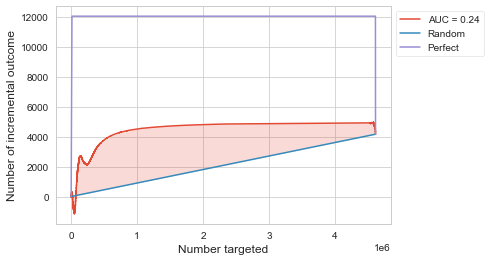

In [96]:
# with ideal Qini curve (red line)
# perfect=True

plot_qini_curve(y_test, uplift_tm, treatment_test, perfect=True);